# 01. data ingestion
---

In [1]:
# LIBRARIES
import os
import numpy as numpy
import matplotlib.pyplot as plt
import shutil
import keras
from keras.preprocessing import image

Step 0. Move classify cat and dog photos

In [2]:
# PATH TO THE MAIN FOLDER
train_dir = "../data/raw/train"

# PATH TO CAT AND DOG FOLDERS
cat_dir = os.path.join(train_dir, "cat")
dog_dir = os.path.join(train_dir, "dog")

# CREATE FOLDERS IF THEY DONT EXIST
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# MOVE CAT PHOTOS
for file_name in os.listdir(train_dir):
    if file_name.startswith("cat") and not os.path.isdir(os.path.join(train_dir, file_name)):
        src_path = os.path.join(train_dir, file_name)
        dst_path = os.path.join(cat_dir, file_name)
        shutil.move(src_path, dst_path)

# MOVE DOG PHOTOS
for file_name in os.listdir(train_dir):
    if file_name.startswith("dog") and not os.path.isdir(os.path.join(train_dir, file_name)):
        src_path = os.path.join(train_dir, file_name)
        dst_path = os.path.join(dog_dir, file_name)
        shutil.move(src_path, dst_path)

Step 1: print the first 9 pictures of cats and dogs

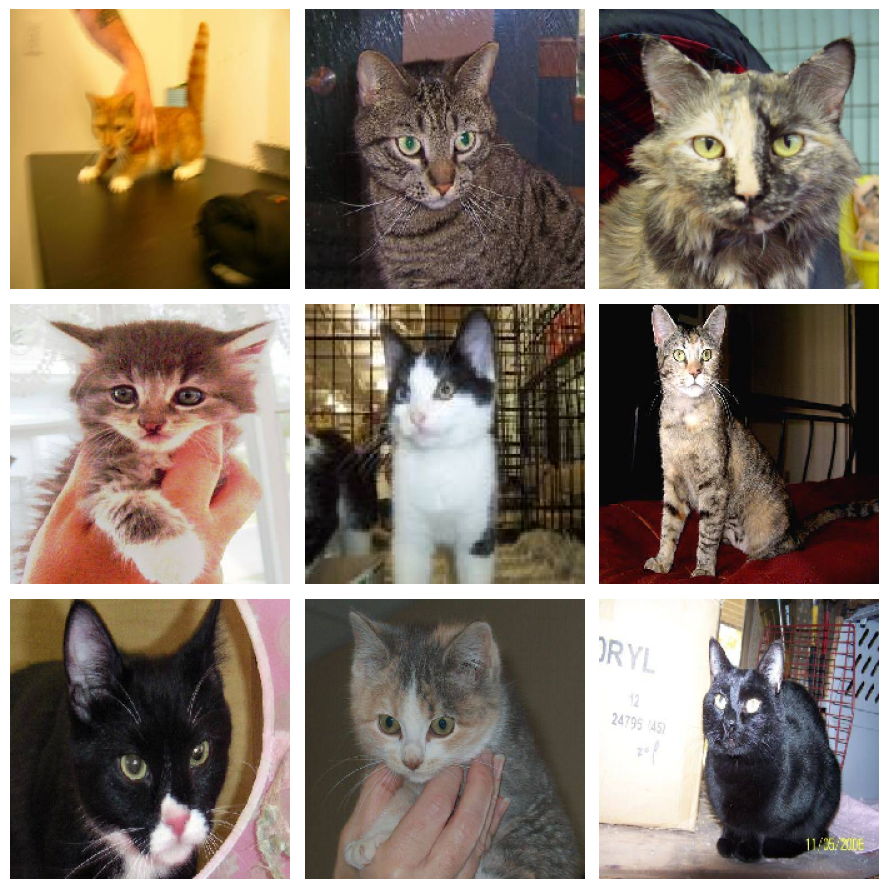

In [3]:
cat_image_files = [file for file in os.listdir(cat_dir) if file.startswith('cat')][:9]


fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, image_file in enumerate(cat_image_files):
    img_path = os.path.join(cat_dir, image_file)
    if os.path.isfile(img_path):
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array /= 255.0 
        axes[i // 3, i % 3].imshow(img_array)
        axes[i // 3, i % 3].axis('off')


plt.tight_layout()
plt.show()



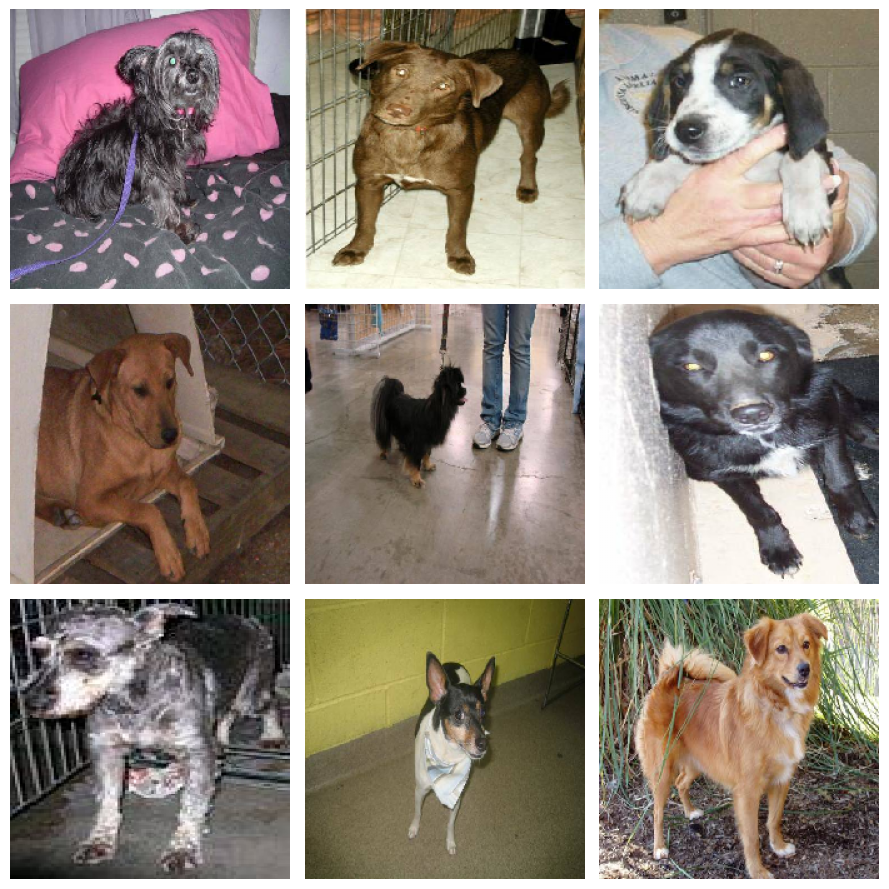

In [4]:
dog_image_files = [file for file in os.listdir(dog_dir) if file.startswith('dog')][:9]

# CREATE A PLOT
fig, axes = plt.subplots(3, 3, figsize=(9, 9))


for i, image_file in enumerate(dog_image_files):
    img_path = os.path.join(dog_dir, image_file)
    if os.path.isfile(img_path):
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array /= 255.0

        axes[i // 3, i % 3].imshow(img_array)
        axes[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()



Step 2: change the pictures to 200 x 200

In [5]:
from keras.preprocessing.image import ImageDataGenerator


train_dir = "../data/raw/train"
test_dir = "../data/raw/"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"],
    batch_size=32,  # Adjust batch size as needed
    class_mode='categorical'  # Assuming you have categorical labels
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size=image_size,
    classes=["test"],
    batch_size=32,  # Adjust batch size as needed
    class_mode='categorical'  # Assuming you have categorical labels

)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Example model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming 2 classes (dog and cat)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [8]:
# Train the Model
model.fit(train_data, epochs = 1)



782/782 [==============================] - 254s 323ms/step - loss: 4.2215 - accuracy: 0.5706


In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: 0.6894 - accuracy: 0.5056
Epoch 1: val_accuracy improved from -inf to 0.06875, saving model to ../models\vgg16_1.h5
100/100 [==============================] - 29s 295ms/step - loss: 0.6894 - accuracy: 0.5056 - val_loss: 1.3933 - val_accuracy: 0.0688


c:\Users\Francesc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.5181
Epoch 2: val_accuracy improved from 0.06875 to 0.70938, saving model to ../models\vgg16_1.h5
100/100 [==============================] - 30s 295ms/step - loss: 0.6907 - accuracy: 0.5181 - val_loss: 1.3977 - val_accuracy: 0.7094
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.6836 - accuracy: 0.5541
Epoch 3: val_accuracy did not improve from 0.70938
100/100 [==============================] - 32s 321ms/step - loss: 0.6836 - accuracy: 0.5541 - val_loss: 1.4160 - val_accuracy: 0.7031


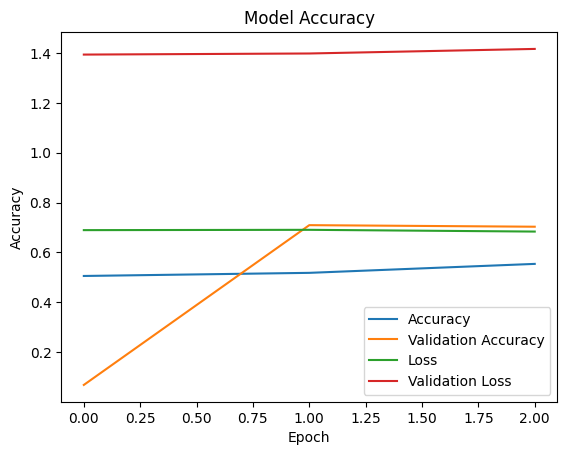

In [10]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

1/1 [==============================] - 0s 55ms/step
cat


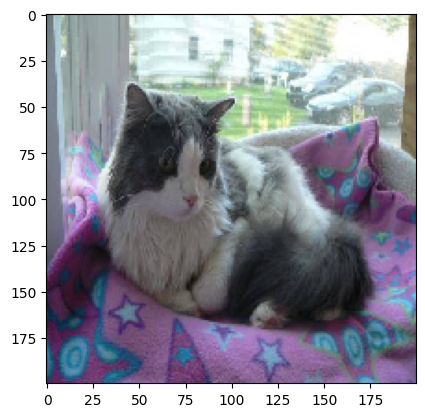

In [31]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/test/61.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")